In [4]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the model and data
rf_model = joblib.load('../models/random_forest_fraud_model.pkl')
data = joblib.load('../data/processed_data.pkl')
X_test = data['X_test']

print("Model and Test Data loaded successfully.")

Model and Test Data loaded successfully.


In [5]:
cols = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']

# Create the Importance DataFrame
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': cols, 'Importance': importances})

# Sort by importance and keep the top 10
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

print("Top 10 features calculated.")

Top 10 features calculated.


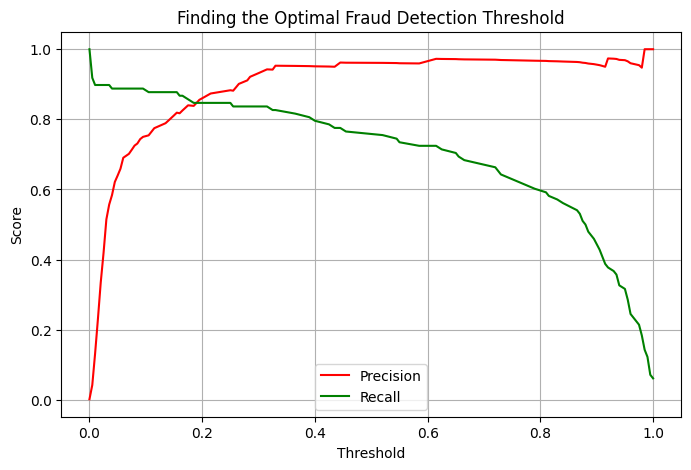

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

y_probs = rf_model.predict_proba(X_test)[:, 1]

# The curve function
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision', color='red')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Finding the Optimal Fraud Detection Threshold')
plt.legend()
plt.grid(True)
plt.show()

Results at 0.3 Threshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



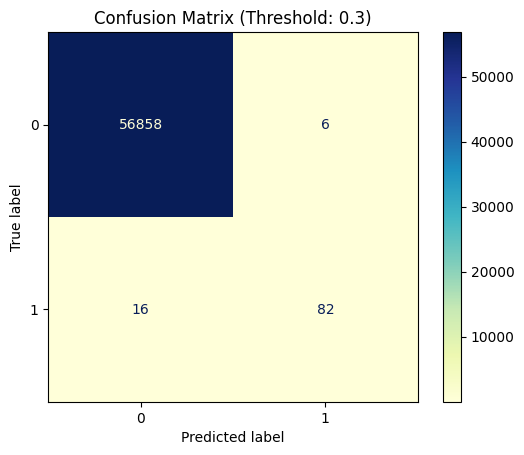

In [8]:
# We lower the threshold to 0.3 to catch more fraud cases
tuned_threshold = 0.3
y_pred_tuned = (y_probs >= tuned_threshold).astype(int)

print(f"Results at {tuned_threshold} Threshold:")
print(classification_report(y_test, y_pred_tuned))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tuned, cmap='YlGnBu')
plt.title(f'Confusion Matrix (Threshold: {tuned_threshold})')
plt.show()

In [9]:
from sklearn.metrics import recall_score

y_pred_custom = (y_probs >= 0.3).astype(int)
y_pred_default = rf_model.predict(X_test)

# 3. Calculate Recall for both
rec_default = recall_score(y_test, y_pred_default)
rec_tuned = recall_score(y_test, y_pred_custom)

# 4. Print the comparison
print(f"Default Recall (Catch Rate): {rec_default:.2%}")
print(f"Tuned Recall (Catch Rate):   {rec_tuned:.2%}")

improvement = ((rec_tuned - rec_default) / rec_default) * 100
print(f"Improvement: Caught {improvement:.1f}% more fraud cases!")

Default Recall (Catch Rate): 75.51%
Tuned Recall (Catch Rate):   83.67%
Improvement: Caught 10.8% more fraud cases!


In [10]:
import joblib
import os

results_to_save = {
    'y_test': y_test,
    'y_probs': y_probs,
    'y_pred_tuned': y_pred_custom
}
joblib.dump(results_to_save, '../data/threshold_results.pkl')
print("Success! Results saved to ../data/threshold_results.pkl. You can now open Notebook 5.")

Success! Results saved to ../data/threshold_results.pkl. You can now open Notebook 5.
